# Logistic Regression:  Breast Cancer Dataset using Pytorch

## 1. Load Data

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

# print("Path to dataset files:", path)

In [2]:
import pandas as pd
import torch 

In [3]:
df = pd.read_csv("Dataset\BreastCancerDataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:

print("Dataset Information:")
df.info()  



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perim

In [5]:
print("\nFirst few rows of the dataset:")
print(df.head()) 




First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimet

In [6]:
print("\nSummary statistics for numerical columns:")
print(df.describe())  


Summary statistics for numerical columns:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
st

## 2. Data Preprocessing

In [7]:
df = df.drop(['id',"Unnamed: 32"] ,axis=1)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:

if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Maps 'M' (Malignant) to 1 and 'B' (Benign) to 0


print("Data after preprocessing:")
print(df.info())


Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  

## 4. Split Data into features

In [11]:
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target


print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (569, 30)
Target (y) shape: (569,)


## 5. Normalize

In [12]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X = scaler.fit_transform(X)


print("Normalized features (first few rows):")
print(X[:5])


Normalized features (first few rows):
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -

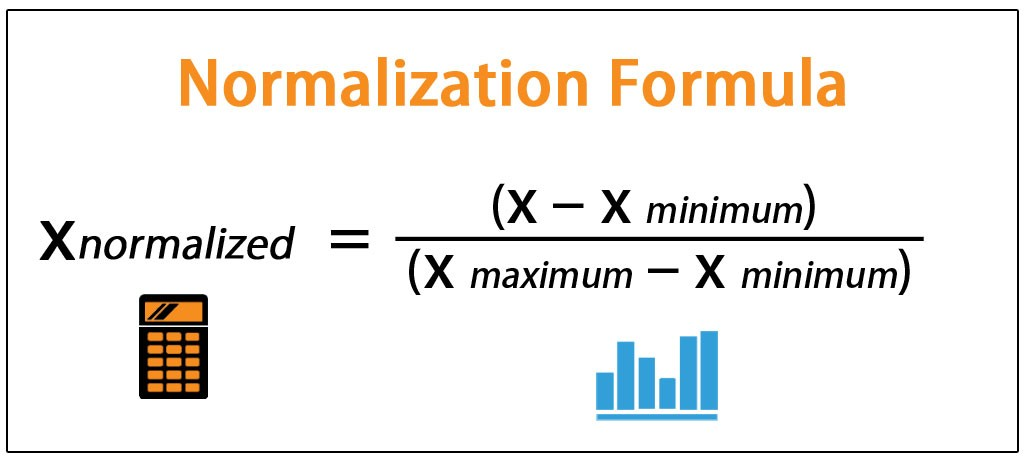

## 6. Split Data into Train and Test

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (455, 30) (455,)
Testing set shape (X_test, y_test): (114, 30) (114,)


## 7. Convert Data to PyTorch Tensors

In [14]:
import torch

# Convert the training and testing sets into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


print("Training set tensor shapes (X_train_tensor, y_train_tensor):", X_train_tensor.shape, y_train_tensor.shape)
print("Testing set tensor shapes (X_test_tensor, y_test_tensor):", X_test_tensor.shape, y_test_tensor.shape)


Training set tensor shapes (X_train_tensor, y_train_tensor): torch.Size([455, 30]) torch.Size([455])
Testing set tensor shapes (X_test_tensor, y_test_tensor): torch.Size([114, 30]) torch.Size([114])


## 8. Apply Logistic Regression Model

In [ ]:
import torch
import torch.nn as nn


class LogisticRegressionModel:
    def __init__(self, input_dim):
        # Initialize weights and bias
        self.weights = torch.randn(input_dim, 1, dtype=torch.float32, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float32, requires_grad=True)

    def forward(self, X):
        # Linear transformation
        linear_output = X @ self.weights + self.bias
       
        predictions = torch.sigmoid(linear_output)
        return predictions

    def parameters(self):
        # Return a list of parameters that need gradients
        return [self.weights, self.bias]

# Instantiate the model with the input dimension of X_train_tensor
input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)

# Display model parameters for verification
print("Initial weights:", model.weights)
print("Initial bias:", model.bias)


Initial weights: tensor([[ 1.4220],
        [-2.3960],
        [-0.0715],
        [ 0.2573],
        [-0.4555],
        [-1.2353],
        [-1.1302],
        [-0.3326],
        [ 2.3658],
        [ 0.7798],
        [ 1.3438],
        [-0.0542],
        [-1.5823],
        [ 0.8409],
        [-1.3338],
        [-1.4209],
        [-0.6011],
        [-0.4964],
        [-0.6106],
        [-0.1735],
        [ 0.0580],
        [-1.1006],
        [ 0.1865],
        [ 0.8855],
        [-0.7693],
        [-0.9169],
        [-0.7065],
        [ 0.4044],
        [ 0.5249],
        [ 0.8137]], requires_grad=True)
Initial bias: tensor([0.], requires_grad=True)


## 9. Define Loss Function and Optimizer

In [16]:
# Define binary cross-entropy as the loss function
loss_function = nn.BCELoss()

# Use SGD optimizer on model parameters with a learning rate of 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Display to confirm setup
print("Loss function:", loss_function)
print("Optimizer:", optimizer)


Loss function: BCELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## 10. Train Model

In [ ]:

num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing X_train_tensor to the model
    y_pred = model.forward(X_train_tensor).squeeze()
    
    # Compute the loss
    loss = loss_function(y_pred, y_train_tensor)
    
    # Zero gradients, backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 1.0548
Epoch [200/1000], Loss: 0.6000
Epoch [300/1000], Loss: 0.4529
Epoch [400/1000], Loss: 0.3780
Epoch [500/1000], Loss: 0.3299
Epoch [600/1000], Loss: 0.2947
Epoch [700/1000], Loss: 0.2671
Epoch [800/1000], Loss: 0.2447
Epoch [900/1000], Loss: 0.2261
Epoch [1000/1000], Loss: 0.2105


## 11. Evaluate (Optional)

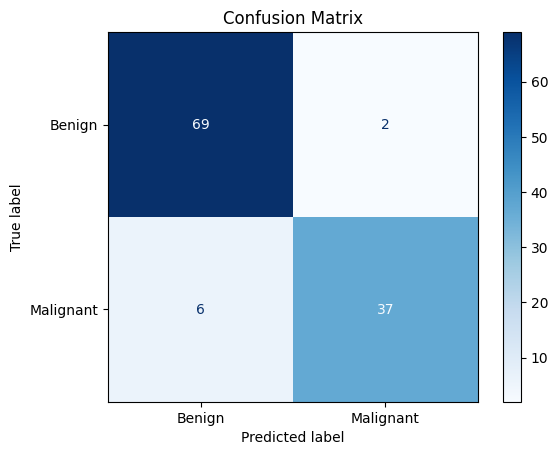

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set the model to evaluation mode by not tracking gradients
with torch.no_grad():
    # Get predictions on the test set
    y_test_pred = model.forward(X_test_tensor).squeeze()
    # Convert probabilities to binary predictions
    y_test_pred_class = (y_test_pred >= 0.5).int()

# Compute the confusion matrix
cm = confusion_matrix(y_test_tensor.int().numpy(), y_test_pred_class.numpy())


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
